In [43]:
# Setup
# -*- coding: utf-8 -*-

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import pandas as p
from IPython.display import display
from sklearn import datasets, linear_model, preprocessing
from sklearn import metrics, neighbors

In [44]:
# STORE ALL REFORMATTED BATTING DATA AND PITHING DATA W/ SALARIES IN CSV

years = ['2002', '2003', '2004', '2005', '2006', 
         '2007', '2008', '2009', '2010', '2011', 
         '2012', '2013', '2014', '2015', '2016', '2017']

teams = ['ARI','ATL','BAL','BOS','CHC','CHW','CIN','CLE','COL','DET','HOU','KCR','LAA','LAD','MIA','MIL','MIN','NYM','NYY','OAK','PHI','PIT','SDP','SEA','SFG','STL','TBR','TEX','TOR','WSN']

luxury_tax_mult = [1.7, 1.66, 1.62, 1.52, 1.43, 
                   1.32,1.26, 1.2, 1.15, 1.1, 
                   1.1, 1.1, 1.03,1.03, 1.03, 1]

batting_train = p.DataFrame()
pitching_train = p.DataFrame() 
batting_test = p.DataFrame()
pitching_test = p.DataFrame()

for idx, year in enumerate(years):
    # Batting salary data for a year -->
    batting_df = p.read_csv('BattingSalary'+year+'.csv', 
                             engine='python')
    pitching_df = p.read_csv('PitchingSalary'+year+'.csv', 
                             engine='python') 
    
    batting_df['Tm'] = batting_df['Tm'].str.replace('ANA', 'LAA')
    batting_df['Tm'] = batting_df['Tm'].str.replace('MON', 'WSN')
    batting_df['Tm'] = batting_df['Tm'].str.replace('TBD', 'TBR')
    batting_df['Tm'] = batting_df['Tm'].str.replace('FLA', 'MIA')

    pitching_df['Tm'] = pitching_df['Tm'].str.replace('ANA', 'LAA')
    pitching_df['Tm'] = pitching_df['Tm'].str.replace('MON', 'WSN')
    pitching_df['Tm'] = pitching_df['Tm'].str.replace('TBD', 'TBR')
    pitching_df['Tm'] = pitching_df['Tm'].str.replace('FLA', 'MIA')    
    
    batting_df.columns = batting_df.columns.str.replace('Salary▼', 'Salary')
    pitching_df.columns = pitching_df.columns.str.replace('Salary▼', 'Salary')
    
    batting_df['Salary'] = batting_df['Salary'].str.replace('$','')
    pitching_df['Salary'] = pitching_df['Salary'].str.replace('$','')
 
    batting_df['Salary'] = batting_df['Salary'].astype(float)
    pitching_df['Salary'] = pitching_df['Salary'].astype(float)
    
    lux = luxury_tax_mult[idx]
    batting_df['Salary'] *= lux
    pitching_df['Salary'] *= lux
    
    if year == years[0]:
        batting_train = batting_df
        pitching_train = pitching_df
    elif year == years[-1]:
        batting_test = batting_df
        pitching_test = pitching_df
    else:
        batting_train = p.concat([batting_train, batting_df])
        pitching_train = p.concat([pitching_train, pitching_df])

    batting_df.to_csv('BattingStats'+year+'.csv', index=False)
    pitching_df.to_csv('PitchingStats'+year+'.csv', index=False)
        

batting_train.drop(batting_train.columns[[0, 1, -2]], axis=1, inplace=True)
batting_train = batting_train.fillna(0)
batting_test.drop(batting_test.columns[[0, 1, -2]], axis=1, inplace=True)
batting_test = batting_test.fillna(0)

pitching_train.drop(pitching_train.columns[[0,1,-1]], axis=1, inplace=True)
pitching_train = pitching_train.fillna(0)
pitching_test.drop(pitching_test.columns[[0,1,-1]], axis=1, inplace=True)
pitching_test = pitching_test.fillna(0)

batting_train.to_csv('AllBattingData.csv', index=False)
batting_test.to_csv('BattingTest.csv', index=False)

pitching_train.to_csv('AllPitchingData.csv', index=False)
pitching_test.to_csv('PitchingTest.csv', index=False)

# Now remove team for the training data
batting_train.drop(batting_train.columns[[1]], axis=1, inplace=True)
batting_test.drop(batting_test.columns[[1]], axis=1, inplace=True)

pitching_train.drop(pitching_train.columns[[1]], axis=1, inplace=True)
pitching_test.drop(pitching_test.columns[[1]], axis=1, inplace=True)


In [45]:
# FORMAT TRAINING DATA FOR BATTING AND PITCHING
batting_train_y = batting_train[['Salary']]
batting_train_x = batting_train.drop(['Salary'], axis=1)
batting_train_x = batting_train_x.drop(['Pos Summary'], axis=1)

pitching_train_y = pitching_train[['Salary']]
pitching_train_x = pitching_train.drop(['Salary'], axis=1) 

# FORMAT TESTING DATA FOR BATTING AND PITCHING
batting_test_y = batting_test[['Salary']]
batting_test_x = batting_test.drop(['Salary'], axis=1)
batting_test_x = batting_test_x.drop(['Pos Summary'], axis=1)

pitching_test_y = pitching_test[['Salary']]
pitching_test_x = pitching_test.drop(['Salary'], axis=1) 

In [46]:
# PREDICT SALARIES BASED OFF OF STATISTICS
batting_regr = linear_model.LinearRegression()
batting_regr.fit(batting_train_x.values, batting_train_y.values)
print batting_regr.coef_

pitching_regr = linear_model.LinearRegression()
pitching_regr.fit(pitching_train_x.values, pitching_train_y.values)
print pitching_regr.coef_

[[  5.01575479e+05  -3.14817084e+04   2.32672328e+03  -6.78893802e+04
   -1.27950676e+05  -4.01916135e+05   2.58492211e+05   3.32286666e+05
    4.39021951e+03  -3.71932228e+05  -4.51857203e+03   7.77971096e+03
    3.48110457e+06   1.90999031e+07  -1.24224317e+08  -3.05492121e+06
   -5.44114494e+06   2.17654606e+05]]
[[  4.93022796e+05   3.41048708e+04  -2.82310191e+04  -1.08359015e+05
   -1.84470501e+04   1.27855710e+04  -1.42158231e+05  -2.60738937e+05
    5.66345547e+06   5.49548846e+03  -2.47686746e+05  -2.93756548e+05
    1.97579936e+06   1.52169166e+05   1.38297749e+06   8.32809213e+05
    4.82804644e+03   4.40810966e+06  -1.23872588e+06]]


In [61]:
full_twenty = np.zeros((1, 15))

positions = ['3', '4', '5', '6', '7', '8', '9', 'SP', 'RP']



for year in years: 
    year_batting_df = p.read_csv('BattingStats'+year+'.csv', engine='python')
    year_pitching_df = p.read_csv('PitchingStats'+year+'.csv', engine='python')
    year_batting_df.drop(year_batting_df.columns[[0, 1, -2]], axis=1, inplace=True)
    year_batting_df = year_batting_df.fillna(0)
    year_pitching_df.drop(year_pitching_df.columns[[0,1,-1]], axis=1, inplace=True)
    year_pitching_df = year_pitching_df.fillna(0)

    year_batting_df['Pos Summary'] = year_batting_df['Pos Summary'].str.replace('*','')
    year_batting_df['Pos Summary'] = year_batting_df['Pos Summary'].str.replace('/','')
    year_batting_df['Pos Summary'] = year_batting_df['Pos Summary'].str[0:1]
     
    if year == '2017':
        test_success_x = np.zeros((1, 15))
    
    for team in teams:
        teamB = year_batting_df[(year_batting_df['Tm'].str.startswith(team))]
        feature_vector = []
        for pos in range(2, 10):
            pos_batting = teamB[(teamB['Pos Summary'].str.startswith(str(pos)))]
            actual_batting_salaries = pos_batting['Salary'].values
            pos_batting.drop(pos_batting.columns[[1,-2, -1]], axis=1, inplace=True)  
            
            if len(pos_batting.values == 0):
                display(pos_batting)
                overpaid = 0.0
                underpaid = 0.0
            else:            
                B_predicted = batting_regr.predict(pos_batting.values) 
                differences = np.ndarray.flatten(B_predicted) - actual_batting_salaries
                overpaid = np.sum(differences[differences > 0])
                underpaid = np.sum(differences[differences < 0])
            feature_vector.append(overpaid)
            feature_vector.append(underpaid)
            
        feature_vector = np.asarray(feature_vector)
        B_predicted = p.DataFrame(np.ndarray.flatten(feature_vector))
        display(B_predicted)

          
#         teamP = year_pitching_df[(year_pitching_df['Tm'].str.startswith(team))]
#         teamP = teamP.head(n=5)
#         actual_pitching_salaries = teamP['Salary'].values
#         teamP.drop(teamP.columns[[1, -1]], axis=1, inplace=True)
#         P_predicted = pitching_regr.predict(teamP.values)
#         differences = np.ndarray.flatten(P_predicted) - actual_pitching_salaries
#         P_predicted = p.DataFrame(np.ndarray.flatten(differences))
         
#         teamB = teamB.sort_values(by='Pos Summary')

#         B_predicted = p.concat([B_predicted, P_predicted])
#         team_Twenty_Predicted = B_predicted.T
#         to_append = team_Twenty_Predicted.values
        
#         if year == '2017':
#             test_success_x = np.vstack([test_success_x, to_append])             
#         else:
#             full_twenty = np.vstack([full_twenty, to_append]) 
# full_twenty = full_twenty[1:]
# test_success_x = test_success_x[1:]

/Users/harrisoncaruthers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
254,32,101,340,-3,0,-2,1,5,1,0.1,11,12,1.1,0.501,0.501,1.0,0.6,11
724,26,70,172,-10,-2,0,1,3,-8,-0.9,5,-3,-0.4,0.488,0.495,-0.5,0.4,-4
730,27,37,123,3,-1,-1,0,2,3,0.3,4,7,0.7,0.509,0.502,0.7,0.2,7


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
232,38,124,348,-3,-1,0,4,-4,-4,-0.4,11,7,0.7,0.497,0.498,0.3,-0.1,4
325,32,72,185,12,-1,0,-1,-2,8,0.8,6,14,1.3,0.511,0.505,1.4,-0.4,15
534,28,76,276,12,0,1,-3,-4,6,0.6,9,14,1.4,0.508,0.504,1.7,-0.8,18


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
735,27,143,626,20,1,0,-3,3,21,2.0,19,40,3.9,0.515,0.513,4.3,-0.1,43


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
31,36,60,238,-1,0,-1,1,1,1,0.0,7,8,0.8,0.501,0.500,0.7,0.2,7
50,36,32,56,-4,0,0,0,0,-4,-0.4,2,-2,-0.3,0.487,0.497,-0.3,0.0,-3
344,31,112,491,-11,-3,0,13,3,1,0.1,15,16,1.5,0.501,0.501,0.2,1.7,3
549,36,74,93,-3,0,0,-1,0,-4,-0.4,3,-1,-0.1,0.495,0.498,0.0,-0.1,0
689,26,4,3,0,0,0,0,0,0,0.0,0,0,0.0,0.495,0.500,0.0,0.0,0


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
159,32,153,652,-21,1,2,-3,8,-14,-1.6,20,6,0.4,0.49,0.491,0.8,0.4,9


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
160,34,148,633,20,2,3,-4,-6,15,1.4,20,34,3.3,0.51,0.509,3.8,-1.1,38


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
127,37,150,577,14,1,1,2,3,22,2.2,18,40,3.9,0.515,0.514,3.7,0.5,37


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
305,30,40,166,5,0,1,-3,-1,1,0.1,5,6,0.6,0.502,0.500,0.9,-0.5,9
432,28,97,261,-6,-2,-1,-8,-3,-19,-2.0,8,-11,-1.2,0.480,0.488,-0.4,-1.2,-3
498,31,123,400,5,-1,1,4,-2,6,0.6,12,19,1.8,0.505,0.504,1.4,0.1,15


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
112,31,109,385,-16,-1,-2,4,6,-9,-1.0,12,3,0.2,0.492,0.494,-0.2,1.0,-1
345,30,81,249,-16,-2,0,3,4,-11,-1.2,8,-4,-0.5,0.485,0.493,-0.8,0.7,-6


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
154,37,25,85,0,-1,0,4,-1,2,0.2,3,4,0.4,0.506,0.501,0.0,0.3,1
470,43,125,383,-2,0,-1,4,-5,-4,-0.5,12,8,0.7,0.497,0.497,0.3,-0.2,4
640,26,85,231,-6,0,0,2,-3,-7,-0.8,7,1,0.0,0.492,0.496,-0.2,-0.1,-1


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
471,37,128,331,-19,-2,0,15,2,-4,-0.5,10,7,0.6,0.497,0.498,-1.0,1.7,-8
704,27,72,232,0,-1,0,2,2,2,0.2,7,9,0.9,0.503,0.501,0.6,0.4,7
741,24,68,242,-4,0,0,1,1,-3,-0.3,8,5,0.4,0.496,0.498,0.4,0.2,4


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
231,34,143,578,-27,-1,-2,3,3,-25,-2.8,18,-7,-1.0,0.481,0.483,-1.3,0.4,-10


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
524,24,154,693,-14,3,0,12,8,9,0.8,20,29,2.8,0.506,0.506,1.6,2.0,17


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
14,30,158,662,41,0,-1,3,-6,37,3.7,21,58,5.7,0.524,0.523,5.4,-0.4,54


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
22,25,154,659,22,0,0,19,3,45,4.6,20,66,6.6,0.53,0.529,4.6,2.3,46


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
25,33,135,579,32,1,-1,-1,-6,26,2.6,18,44,4.4,0.52,0.517,4.4,-0.7,45


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
264,32,56,146,-5,0,-1,-4,3,-8,-0.7,5,-2,-0.2,0.487,0.495,0.2,-0.1,2
698,25,2,0,0,0,0,0,0,0,0.0,0,0,0.0,0.501,0.500,0.0,0.0,0
779,26,125,450,-19,0,-3,3,7,-12,-1.1,17,5,0.5,0.491,0.493,0.2,1.0,2


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
206,36,116,488,-1,1,0,-4,-7,-11,-1.1,18,7,0.7,0.49,0.493,1.1,-1.1,11


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
579,26,122,479,-2,4,1,3,3,9,0.9,18,27,2.6,0.507,0.505,2.3,0.6,24


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
147,28,161,682,1,0,-2,4,2,6,0.6,26,31,3.0,0.503,0.503,2.6,0.7,27


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
148,36,117,413,-11,-2,-1,18,6,9,1.0,15,25,2.4,0.508,0.506,0.7,2.4,7
787,28,8,16,-2,-1,0,1,0,-2,-0.2,1,-1,-0.1,0.481,0.499,-0.2,0.2,-2


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
263,32,131,513,1,-4,-1,-2,-8,-14,-1.3,19,6,0.5,0.490,0.492,0.7,-1.0,8
554,30,149,652,3,-1,1,21,0,24,2.4,24,48,4.7,0.516,0.515,2.6,2.1,27


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
358,29,136,502,-7,5,3,-4,2,0,0.1,19,19,1.8,0.500,0.5,2.2,-0.1,22
778,26,6,3,1,0,0,0,0,1,0.1,0,1,0.1,0.512,0.5,0.1,0.0,1


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
682,25,136,541,5,0,1,-3,-7,-3,-0.3,20,17,1.6,0.498,0.498,1.9,-0.9,20
687,23,17,33,-5,0,0,-1,0,-6,-0.6,1,-5,-0.5,0.463,0.496,-0.5,-0.1,-4


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
208,30,132,519,-9,-1,1,4,7,2,0.2,19,21,2.1,0.501,0.501,1.7,1.2,17
458,31,57,173,-4,0,-1,2,2,-1,-0.1,6,6,0.5,0.499,0.499,0.3,0.5,4


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
136,30,90,298,-18,-1,0,3,-4,-21,-2.1,11,-10,-1.0,0.476,0.487,-1.3,-0.1,-13
282,30,137,506,9,-2,-2,3,-8,0,0.0,19,19,1.8,0.500,0.500,1.5,-0.5,16


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
450,34,107,386,-12,1,0,8,3,0,0.0,14,14,1.4,0.500,0.500,0.6,1.1,6
595,31,84,222,-2,-1,0,6,2,5,0.5,8,13,1.3,0.506,0.503,0.7,0.8,7


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
620,26,156,676,8,0,0,6,3,18,1.8,25,43,4.2,0.511,0.511,3.6,0.9,37


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
34,28,156,693,21,0,-2,16,8,44,4.4,25,69,6.8,0.528,0.527,5.2,2.4,53


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
3,30,120,518,53,-1,-2,1,-8,43,4.2,19,63,6.0,0.535,0.526,6.0,-0.7,62
551,43,72,222,-1,0,0,-1,-2,-4,-0.4,8,4,0.4,0.495,0.498,0.6,-0.4,6


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
67,28,154,702,8,7,4,3,3,25,2.5,25,50,4.8,0.516,0.515,4.5,0.7,46


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
253,28,152,612,5,1,1,6,-6,7,0.8,23,30,2.9,0.505,0.504,2.3,0.1,24


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
93,33,92,303,-3,-1,0,-5,4,-5,-0.6,9,5,0.4,0.495,0.497,0.9,-0.1,10
347,37,90,256,-16,-1,0,0,4,-13,-1.4,8,-5,-0.6,0.485,0.492,-0.6,0.4,-5


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
69,38,146,595,21,-3,-1,-6,-8,4,0.3,19,22,2.1,0.503,0.502,2.7,-1.5,28


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
368,33,67,174,-8,3,1,3,1,-1,-0.1,5,5,0.5,0.499,0.500,0.1,0.4,2
700,27,146,529,22,2,-1,-7,2,18,1.7,16,34,3.4,0.512,0.511,4.1,-0.6,41


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
371,29,98,225,-3,0,0,-3,1,-6,-0.7,7,1,0.0,0.494,0.496,0.4,-0.2,4


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
165,29,142,568,-6,-1,-1,-14,8,-15,-1.6,18,3,0.1,0.489,0.491,1.6,-0.7,17
660,27,30,81,-7,1,0,0,1,-5,-0.5,3,-3,-0.3,0.482,0.497,-0.3,0.1,-2


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
108,35,132,534,1,1,-1,-9,-5,-13,-1.4,17,4,0.2,0.490,0.492,1.2,-1.5,13
496,34,58,91,-4,-1,0,3,-1,-2,-0.2,3,1,0.1,0.497,0.499,-0.2,0.2,-2
624,26,111,231,-11,-1,0,-3,-2,-16,-1.7,7,-9,-1.0,0.485,0.490,-0.7,-0.5,-5


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
691,22,153,628,-19,4,2,-5,3,-15,-1.7,20,5,0.3,0.49,0.49,0.8,-0.3,10


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
5,33,150,666,53,0,-1,-8,-6,38,3.7,20,58,5.7,0.526,0.524,6.6,-1.6,66


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
565,26,86,302,-16,1,0,2,5,-8,-0.8,11,3,0.3,0.491,0.495,0.1,0.7,1


,Age,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR
196,26,151,630,18,-2,-3,-7,-9,-2,-0.1,24,22,2.1,0.499,0.499,2.8,-1.5,28
598,27,76,224,-6,-1,0,4,-4,-8,-0.7,8,1,0.1,0.490,0.495,-0.3,0.0,-3


ValueError: Found array with 0 sample(s) (shape=(0, 18)) while a minimum of 1 is required.

In [38]:
teamWins = p.read_csv('teamWins.csv')
teamWins.drop(teamWins.columns[0], axis=1, inplace=True)
years = teamWins.values.tolist()
success_y_orig = [item for sublist in years for item in sublist]
success_y = success_y_orig[30:]

In [39]:
# PREDICT WINS
wins_regr = linear_model.LinearRegression()
success_y = np.asarray(success_y)
wins_regr.fit(full_twenty, success_y)
print wins_regr.coef_

test_success_y = np.asarray(success_y_orig[:30])

actual = test_success_y.T
predicted = wins_regr.predict(test_success_x).T
sidebyside = np.vstack((actual, predicted))
display(p.DataFrame(sidebyside))

print(metrics.mean_squared_error(actual, predicted))

[-1.76355966 -1.41984863  1.3493     -0.90603489  0.2636227  -2.43034279
 -3.07693958 -2.26717806 -0.21780167  0.44873849  0.5893984  -1.66923311
  0.32832859  0.59836369 -1.46547507]


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,93.000000,72.000000,75.000000,93.000000,92.000000,67.000000,68.0000,102.000000,87.000000,64.000000,...,66.000000,75.000000,71.000000,64.000000,78.000000,83.000000,80.000000,78.00000,76.000000,97.000000
1,80.039385,82.631314,82.033638,83.413992,83.901426,81.425916,82.1532,81.080051,82.633867,83.148927,...,80.751563,87.508655,79.517025,86.316155,80.978143,78.544975,79.903934,86.05082,83.430832,83.082886


136.54205392


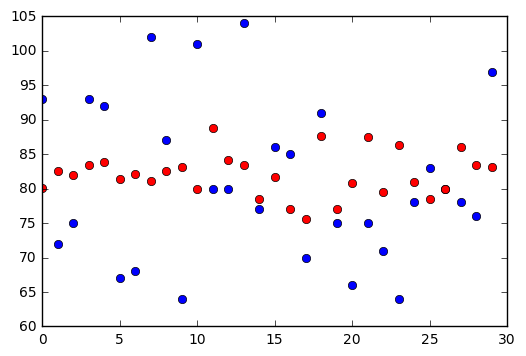

In [40]:
plt.plot(np.arange(0,30), actual, 'bo')
plt.plot(np.arange(0,30), predicted, 'ro')
plt.show()


In [ ]:
# K Nearest Neighbors